In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import pingouin as pg
from mdi_computation import mdi_compute, smdi_compute
%matplotlib widget

<h1 align="center">Organizing and Loading Data</h1>

In [19]:
compiled_csv_paths = glob.glob("./protein_extract_spectra/*scans.csv")
wavenumber = pd.read_csv("./wavenumber.csv")
pe24, pe32 = [pd.read_csv(path) for path in compiled_csv_paths]

scan_number_dataframes = [pe24, pe32]

for df in scan_number_dataframes:
    df["average"] = df.mean(axis=1)

<h1 align="center">Visualizing Spectra</h1>

In [20]:
colors = ["blue", "green"]
scan_labels = ["24", "32"]

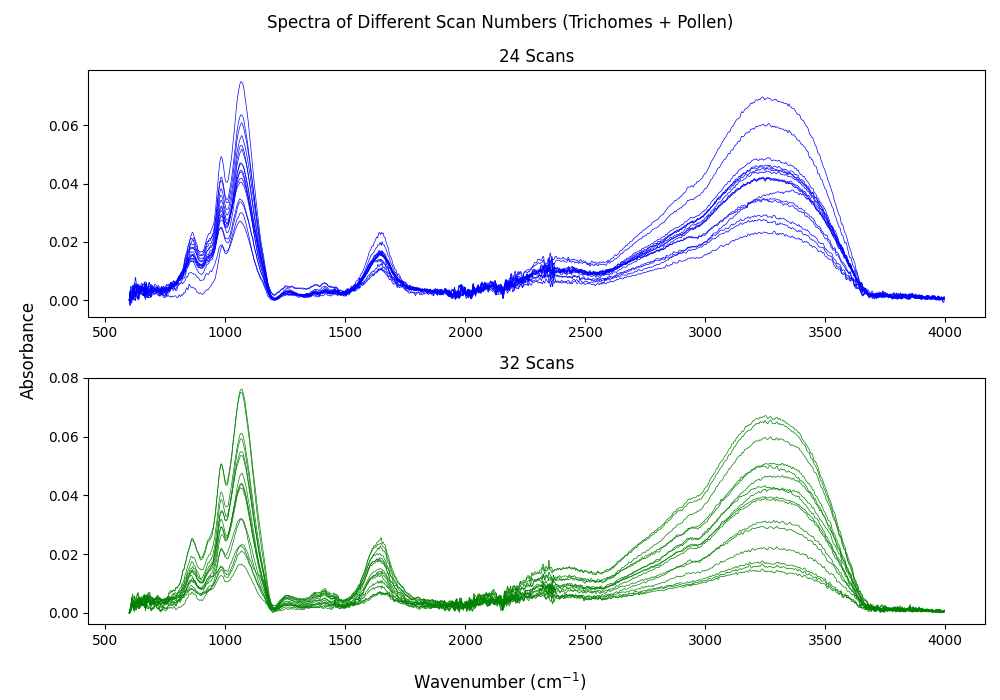

In [31]:
all_scans_fig, asf_axes = plt.subplots(2, 1, figsize=(10, 7))

for axis, name, color, df in zip(
    asf_axes, scan_labels, colors, scan_number_dataframes
):
    for replicate in df.columns:
        spectrum = df[replicate]
        axis.plot(wavenumber, spectrum, color=color, linewidth=0.5)

    axis.set(title=f"{name} Scans")

all_scans_fig.suptitle("Spectra of Different Scan Numbers (Trichomes + Pollen)")
all_scans_fig.supxlabel("Wavenumber (cm$^{-1}$)")
all_scans_fig.supylabel("Absorbance")

all_scans_fig.tight_layout()

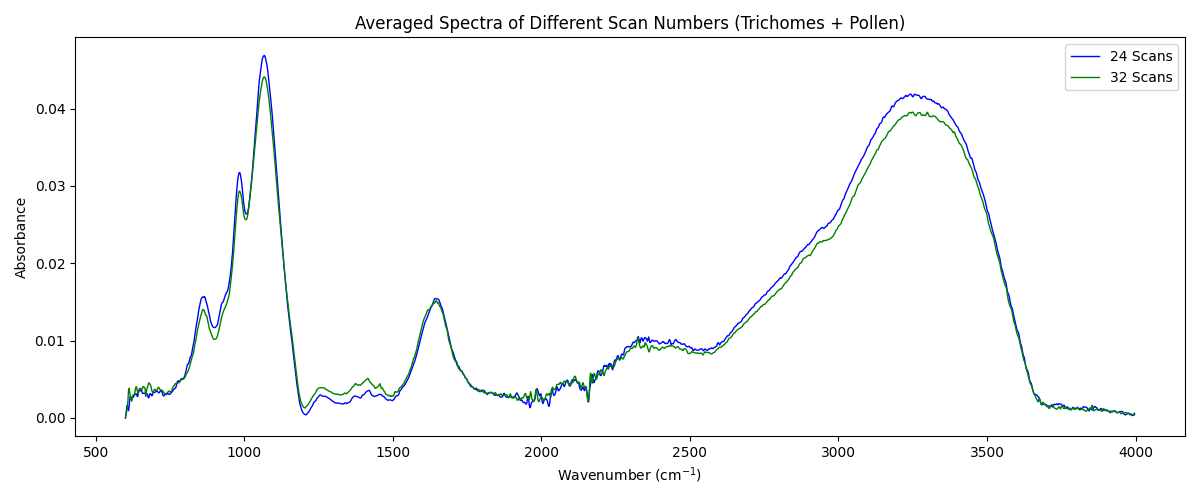

In [22]:
ave_scans_fig, ave_axes = plt.subplots(1, 1, figsize=(12, 5))

for name, color, df in zip(scan_labels, colors, scan_number_dataframes):
    spectrum = df["average"]
    ave_axes.plot(
        wavenumber, spectrum, color=color, linewidth=1, label=f"{name} Scans"
    )

ave_axes.legend()
ave_axes.set(
    title="Averaged Spectra of Different Scan Numbers (Trichomes + Pollen)",
    xlabel="Wavenumber (cm$^{-1}$)",
    ylabel="Absorbance",
)
ave_scans_fig.tight_layout()

<h1 align="center">MDI Computation & Analysis</h1>

In [23]:
mdi_compute("protein_extract_spectra", "mdi_results")
#smdi_compute("mdi_results", "mdi_results")

In [24]:
mdi_results = pd.read_csv("./mdi_results/master_mdi.csv")

In [25]:
mdi_results

,protein_extract_24_scans_mdi,protein_extract_32_scans_mdi
0,-0.012773,-0.012600
1,-0.013158,-0.012833
2,-0.013227,-0.012454
3,-0.012229,-0.012641
4,-0.012552,-0.012987
5,-0.012168,-0.012523
6,-0.012417,-0.012670
7,-0.012371,-0.012526
8,-0.012293,-0.012315
9,-0.012776,-0.012824


<h2 align="center">Visualization</h2>

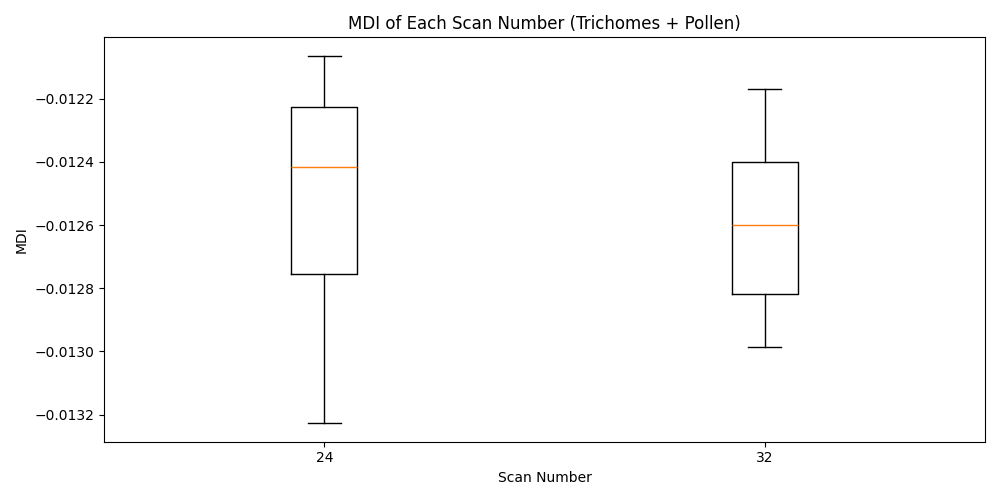

In [26]:
plt.close("all")
mdi_box, box_axis = plt.subplots(1, 1, figsize=(10, 5))

pooled_mdi_data = [mdi_results[column] for column in mdi_results.columns]

box_axis.boxplot(x=pooled_mdi_data)
box_axis.set(
    title="MDI of Each Scan Number (Trichomes + Pollen)",
    xlabel="Scan Number",
    ylabel="MDI",
    xticklabels=['24', '32'],
)

mdi_box.tight_layout()

<h2 align="center">Statistical Analyses</h2>

<h3 align="center">Test for Normality (Shapiro-Wilk Test)</h3>

In [27]:
pg.normality(mdi_results, method="normaltest", alpha=0.05).round(3)

c:\Users\Danilo Pudolin Jr\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


,W,pval,normal
protein_extract_24_scans_mdi,1.547,0.461,True
protein_extract_32_scans_mdi,1.245,0.537,True


<h3 align="center">Test for Homogeneity of Variances (Levene's Test)</h3>

In [28]:
pg.homoscedasticity(mdi_results, method="levene").round(3)

,W,pval,equal_var
levene,1.82,0.188,True


<h3 align="center">Group Comparison (One-Way ANOVA)</h3>

In [29]:
mdi_results_melted = mdi_results.melt(var_name="scan_number", value_name="mdi")

In [30]:
pg.anova(mdi_results_melted, dv="mdi", between="scan_number", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,scan_number,4.554596e-08,1,4.554596e-08,0.46925,0.498964,0.016483
1,Within,2.717713e-06,28,9.706117e-08,NaN,NaN,NaN
